<a href="https://colab.research.google.com/github/haroonwaheed19/ModelSelection_ModelEvaluation_HyperParameterTunning/blob/main/Cross_Validation_and_HyperParameter_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Importing the models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Data Collection and Processing

In [8]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [5]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [9]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


#**Train Test Split**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=3)

In [9]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Comparing the performance of the models

In [10]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, Y_train)

    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)



In [ ]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.7704918032786885
Accuracy score of the  SVC(kernel='linear')  =  0.7704918032786885
Accuracy score of the  KNeighborsClassifier()  =  0.6557377049180327
Accuracy score of the  RandomForestClassifier()  =  0.8032786885245902


#**Cross Validation**

Logistic Regression

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
82.83


Support Vector Classifier

In [ ]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print(mean_accuracy_svc)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
82.83


Creating a Function to compare the models

In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,Y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy % of the  LogisticRegression(max_iter=1000) 82.83
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy % of the  SVC(kernel='linear') 82.83
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy % of the  KNeighborsClassifier() 64.39
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.81967213 0.8852459  0.7704918  0.83333333 0.76666667]
Accuracy % of the  RandomForestClassifier() 81.51
----------------------------------------------


**GridSerachCV and RandomizedSearchCV**

In [11]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

X1 = data_frame.drop(columns='label', axis=1)
Y1 = data_frame['label']

X1 = np.asarray(X)
Y1 = np.asarray(Y)


**GridSearchCV Model**

In [12]:
X1 = np.asarray(X1)
Y1 = np.asarray(Y1)

# loading the SVC model
model = SVC()

# hyperparameters

parameters = {
  'kernel':['linear','poly','rbf','sigmoid'],
  'C':[1, 5, 10, 20]
}

# grid search
classifier = GridSearchCV(model, parameters, cv=5)

# fitting the data to our model
classifier.fit(X1, Y1)

classifier.cv_results_


{'mean_fit_time': array([6.15087605e-01, 2.59776115e-03, 2.88720131e-03, 4.25171852e-03,
        1.80462804e+00, 5.60092926e-03, 4.28619385e-03, 5.22775650e-03,
        3.50083513e+00, 3.42774391e-03, 2.90126801e-03, 3.68762016e-03,
        4.70172777e+00, 3.55939865e-03, 2.69303322e-03, 2.98228264e-03]),
 'std_fit_time': array([5.19794206e-01, 5.28888293e-05, 6.89765016e-05, 1.49259856e-04,
        5.21485990e-01, 1.64561456e-03, 2.72834855e-04, 1.97495762e-04,
        7.23184982e-01, 5.52742653e-04, 2.50287523e-04, 1.15111645e-03,
        2.59410991e+00, 4.19034158e-04, 6.69572761e-05, 4.45732435e-04]),
 'mean_score_time': array([0.00105143, 0.00098796, 0.00136037, 0.00153956, 0.00151076,
        0.00145788, 0.00204425, 0.00180793, 0.0011723 , 0.00098925,
        0.00138483, 0.00156312, 0.00108232, 0.00091591, 0.00110621,
        0.00119767]),
 'std_score_time': array([1.17581121e-04, 2.98514533e-05, 3.71291757e-05, 9.91533082e-05,
        6.41514224e-04, 7.80457893e-05, 7.69218889e-

In [13]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

result.head()

{'C': 1, 'kernel': 'linear'}
0.8283060109289618


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.615088,0.519794,0.001051,0.000118,1,linear,"{'C': 1, 'kernel': 'linear'}",0.819672,0.885246,0.803279,0.866667,0.766667,0.828306,0.042928,1
1,0.002598,0.000053,0.000988,0.000030,1,poly,"{'C': 1, 'kernel': 'poly'}",0.672131,0.606557,0.688525,0.700000,0.600000,0.653443,0.041957,11
2,0.002887,0.000069,0.001360,0.000037,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.606557,0.606557,0.737705,0.683333,0.583333,0.643497,0.057984,12
3,0.004252,0.000149,0.001540,0.000099,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.540984,0.540984,0.524590,0.550000,0.550000,0.541311,0.009282,13
4,1.804628,0.521486,0.001511,0.000642,5,linear,"{'C': 5, 'kernel': 'linear'}",0.803279,0.918033,0.786885,0.833333,0.750000,0.818306,0.056657,3


**RandomizedSearchCV Model**

In [14]:
# loading the SVC model
model = SVC()

# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

# grid search
classifier = RandomizedSearchCV(model, parameters, cv=5)

# fitting the data to our model
classifier.fit(X, Y)

classifier.cv_results_


{'mean_fit_time': array([4.66744757e-01, 1.94459352e+00, 4.65297198e+00, 4.15143967e-03,
        3.84359360e-03, 3.57527733e-03, 5.68337440e-03, 3.61127853e-03,
        4.93073463e-03, 4.13908958e-03]),
 'std_fit_time': array([2.54854410e-01, 7.14144425e-01, 2.71309859e+00, 1.08406241e-04,
        2.12569780e-04, 7.64306751e-05, 1.18826231e-03, 1.56178357e-04,
        1.00516097e-04, 1.04792991e-04]),
 'mean_score_time': array([0.00222492, 0.00220723, 0.00212464, 0.00202971, 0.00186181,
        0.00201492, 0.00230689, 0.00176578, 0.00213623, 0.00206513]),
 'std_score_time': array([1.13632606e-04, 9.28305815e-05, 6.77366611e-05, 7.57266951e-05,
        4.39262535e-05, 9.89186473e-05, 5.44238428e-04, 8.92135945e-05,
        9.72096609e-05, 1.68277542e-04]),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'sigmoid', 'sigmoid',
                    'rbf', 'poly', 'poly', 'sigmoid', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False,
    

In [15]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

result.head()

{'kernel': 'linear', 'C': 1}
0.8283060109289618


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.466745,0.254854,0.002225,0.000114,linear,1,"{'kernel': 'linear', 'C': 1}",0.819672,0.885246,0.803279,0.866667,0.766667,0.828306,0.042928,1
1,1.944594,0.714144,0.002207,0.000093,linear,5,"{'kernel': 'linear', 'C': 5}",0.803279,0.918033,0.786885,0.833333,0.750000,0.818306,0.056657,2
2,4.652972,2.713099,0.002125,0.000068,linear,20,"{'kernel': 'linear', 'C': 20}",0.770492,0.901639,0.836066,0.800000,0.783333,0.818306,0.047126,2
3,0.004151,0.000108,0.002030,0.000076,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.459016,0.442623,0.655738,0.500000,0.483333,0.508142,0.076384,9
4,0.003844,0.000213,0.001862,0.000044,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.475410,0.459016,0.639344,0.483333,0.483333,0.508087,0.066226,10


**Model Selection**

With Default Parameters

In [16]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, Y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 82.83 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Acccuracy score of the  SVC(kernel='linear') = 82.83 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Acccuracy score of the  KNeighborsClassifier() = 64.39 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 83.81 %
----------------------------------------------------------

**Different Parmeters with GridSearchCV**

In [17]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {


    'log_reg_hyperparameters': {

        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {

        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {

        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {

        'n_estimators' : [10, 20, 50, 100]
    }
}

In [18]:
type(model_hyperparameters)
print(model_hyperparameters.keys())
model_hyperparameters['log_reg_hyperparameters']
model_keys = list(model_hyperparameters.keys())
print(model_keys)
model_keys[0]
model_hyperparameters[model_keys[0]]

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])
['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


{'C': [1, 5, 10, 20]}

In [19]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,Y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

  ModelSelection(models_list, model_hyperparameters)

**Accuracy Score**

In [20]:
model = LogisticRegression(max_iter=1000)

# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

0.8636363636363636
Accuracy on Training data :  86.36 %
0.7704918032786885
Accuracy on Test data :  77.05 %


**Confusion Matrix**

[[20  8]
 [ 6 27]]


<Axes: >

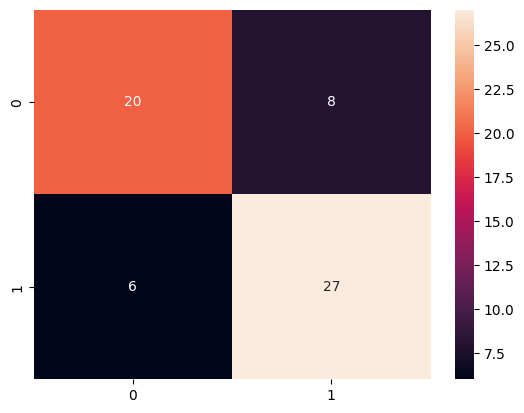

In [21]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

**Precision And Recall**

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [23]:
# precision for training data predictions
precision_train = precision_score(Y_train, X_train_prediction)
print('Training data Precision =', precision_train)

# precision for test data predictions
precision_test = precision_score(Y_test, X_test_prediction)
print('Test data Precision =', precision_test)


Training data Precision = 0.8461538461538461
Test data Precision = 0.7714285714285715


In [24]:
# recall for training data predictions
recall_train = recall_score(Y_train, X_train_prediction)
print('Training data Recall =', recall_train)

# recall for test data predictions
recall_test = recall_score(Y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Training data Recall = 0.9166666666666666
Test data Recall = 0.8181818181818182


**F1 Score**

In [25]:
# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)

# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Training data F1 Score = 0.88
Test data F1 Score = 0.8181818181818182


**3 of them in one Function**

In [26]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

  # classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.8461538461538461
Recall = 0.9166666666666666
F1 Score = 0.88
